# Lecture 8 - Relative clauses and truth checking

The method of *slash categories* is a methodology for grammars that cover *wh*-movement and other varieties of "movement" using symbols with the shape *X/Y*. This symbol is interpreted as an *X* with a missing *Y*. For instance, *S/NP* is a sentence with a "missing *NP*", such as the sentence following *who* in the relative clauses *that Cyril chases* and *that chases Cyril*.

We begin with the analysis of relative clauses in a grammar without semantics.

In [1]:
import nltk
from nltk import grammar, parse
from nltk.parse.generate import generate
from nltk.parse.util import load_parser

In [2]:
nltk.data.show_cfg('/local/teach/cl21/grammar/simple-slash.fcfg')

% start S
# Grammar Rules
S -> NP VP
S/NP -> NP/NP VP
S/NP -> NP VP/NP
NP -> D N
VP -> TV NP
VP/NP -> TV NP/NP
CP -> 'that' S/NP
N -> N CP
# Lexical Rules
NP -> 'Angus'
NP -> 'Cyril'
D -> 'every'
D -> 'some'
N -> 'man'
N -> 'dog'
TV -> 'chases'
#  Primitive slash symbol
NP/NP ->


In [27]:
pr = load_parser('/local/teach/cl21/grammar/simple-slash.fcfg', trace=0,cache=False)
s1 = 'Angus chases Cyril'.split()
for tree in pr.parse(s1): print(tree)

(S[] (NP[] Angus) (VP[] (TV[] chases) (NP[] Cyril)))


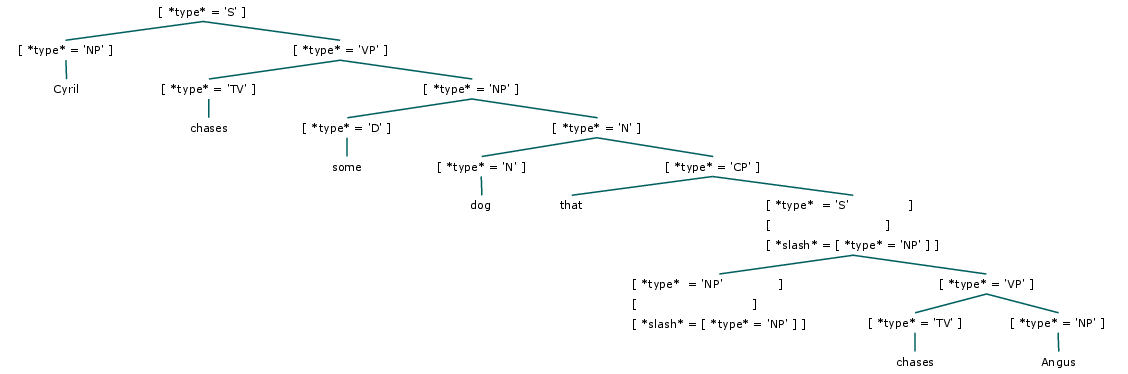

In [4]:
pr = load_parser('/local/teach/cl21/grammar/simple-slash.fcfg', trace=0,cache=False)
s1 = 'Cyril chases some dog that chases Angus'.split()
t1 = next(pr.parse(s1))
t1

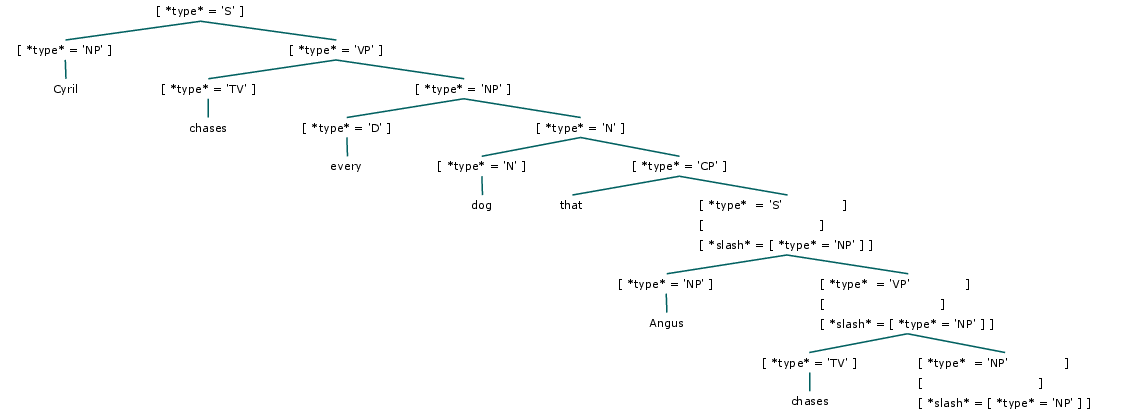

In [5]:
 s2 = 'Cyril chases every dog that Angus chases'.split()
t2 = next(pr.parse(s2))
t2

### Slash categories
Symbols that are written *X/Y* in the grammar become feature structures with a slash attribute in a feature grammar.

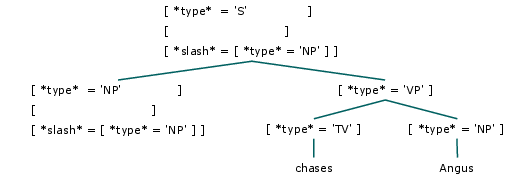

In [6]:
t1[(1,1,1,1,1)]

In [7]:
print(t1[(1,1,1,1,1)].label())

[ *type*  = 'S'               ]
[                             ]
[ *slash* = [ *type* = 'NP' ] ]


In [8]:
t1[(1,1,1,1,1)].label()

S[]/NP[]

The two items above show different print formats for the same feature structure.  The second one is also the read format used in the string form of a grammar.

This is a VP with an NP slash in the relative clause *that Angus chases*.

In [9]:
print(t2[(1,1,1,1,1,1)].label())

[ *type*  = 'VP'              ]
[                             ]
[ *slash* = [ *type* = 'NP' ] ]


### Slash inheritance
Typically in a configuration where a child has a slash, it is inherited by the parent. This is illustrated in this configuration. The slash feature on the VP is inherited on the S.

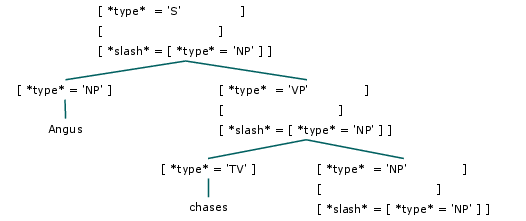

In [10]:
t2[(1,1,1,1,1)]

Inheritance is expressed by this production in the grammar.
```
S/NP -> NP VP/NP
```
This can be generalized using a variable. The current grammar only has NP slashes, though.
```
S/?x -> NP VP/?x
```


### Slash elimination
Moving up the tree, a slash is terminated at a node that is licensed by a *slash elimination production*. In this cases, this is the production that introduces the relative clause symbol CP.
```
CP -> 'that' S/NP
```
This says that a relative clause consists (or can consist) of *that* followed by an *S* with an *NP* missing. A slash elimination production has a slash on the right side, but not the left. The production above licenses the top node in each of these trees.

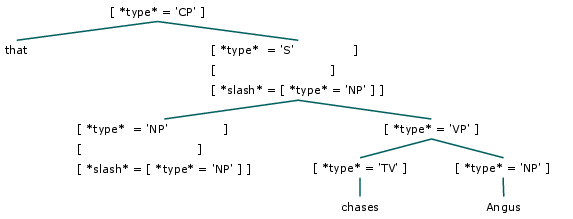

In [11]:
t1[(1,1,1,1)]

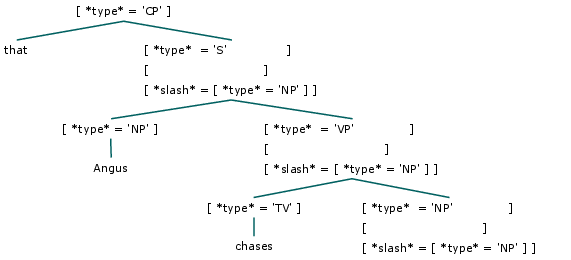

In [12]:
t2[(1,1,1,1)]

### Slash introduction
In ``simple-slash.fcfg``, slash NP is introduced by a production with an empty right hand side. Informally, this 
introduces a *trace*, which is conceived us the *empty category* left behind by movement.
```
NP/NP ->
```
An empty category in a tree is a node that is not a grammar terminal (in our grammars, not a string) and does not have any children in the tree.   Notation for an empty category in linguistic literature is $t$ (for trace) or $e$
(for epsilon, the empty string).

## Semantics for slash in relative clauses

Ultimately relative clauses should contribute properties of individuals.  These are target meanings for two relative clauses.

$$
\begin{array}{lll}
\mbox{[who Angus chases $t$]} & \lambda y.\mbox{chase}(\mbox{angus},y) & \mbox{being a $y$ such that Angus chases $y$}\\
\mbox{[who $t$ chases Cyril]} & \lambda y.\mbox{chase}(y,\mbox{cyril}) & \mbox{being a $y$ such that $y$ chases Cyril}\\
\end{array}
$$

Somehow the variable that is bound at the level of the relative clause has to be generated in the slash position, and passed up in the semantics. A clean way of doing this is to maintain an extra lambda binder at every level of the tree above the trace and below the slash termination.  This is done in the following grammar with semantics.

In [28]:
nltk.data.show_cfg('/local/teach/cl21/grammar/simplest-sem-slash.fcfg')

% start S
# Grammar Rules
S[SEM = <?subj(?vp)>] -> DP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]
S[SEM = <?vp(?subj)>] -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]
S[SEM = <\y.(?vp(y)(?subj))>]/NP -> NP[NUM=?n,SEM=?subj] VP[NUM=?n,SEM=?vp]/NP
S[SEM = <\y.(?vp(y))>]/NP -> NP/NP VP[NUM=?n,SEM=?vp]
DP[NUM=?n,SEM=<?det(?nom)> ] -> Det[NUM=?n,SEM=?det]  N[NUM=?n,SEM=?nom]
VP[NUM=?n,SEM=?v] -> IV[NUM=?n,SEM=?v]
VP[NUM=?n,SEM=<?v(?obj)>] -> TV[NUM=?n,SEM=?v] NP[SEM=?obj]
VP[NUM=?n,SEM=<\y x.(?v(y)(x))>]/NP -> TV[NUM=?n,SEM=?v] NP/NP[SEM=?obj]
CP[SEM=?P] -> 'that' S[SEM=?P]/NP
N[NUM=?n,SEM=<\x.(?P(x) & ?Q(x))>] -> N[NUM=?n,SEM=?P] CP[SEM=?Q]
# Lexical Rules
NP[-LOC,NUM=sg,SEM=<angus>] -> 'Angus'
NP[-LOC,NUM=sg,SEM=<cyril>] -> 'Cyril'
NP[-LOC,NUM=sg,SEM=<irene>] -> 'Irene'
Det[NUM=sg,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
Det[NUM=pl,SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
Det[SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'some'
Det[NUM=sg,SEM=<\P Q.exists x.(P(x) & Q(x))>] -> 'a'
Det[NUM=sg,SEM=<\P Q.ex

In this grammar, whereever there is a slash on the left hand side (that is, wherever the left hand side has the form `X[...]/NP`), the semantics for the left hand side has an extra lambda binder $\lambda y$ that can be conceived of as binding a variable in the position of the trace.

In the upcoming examples, the start category is set to CP in the text file, in order to look at structures and semantics for relative clauses.

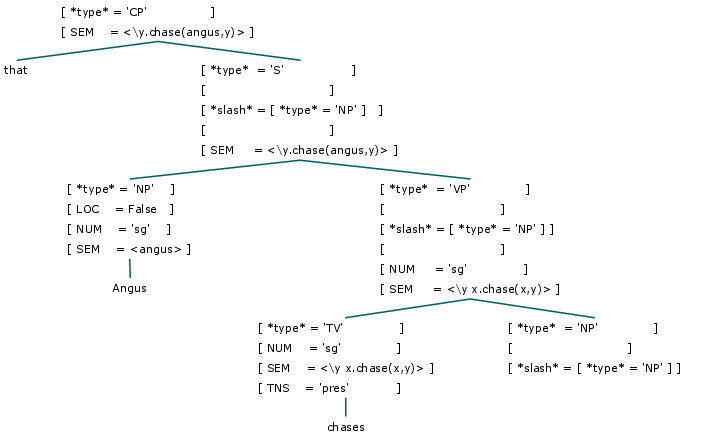

In [29]:
prs = load_parser('/local/teach/cl21/grammar/simple-sem-slash-cp.fcfg', trace=0,cache=False)
s1 = 'that Angus chases'.split()
t1 = next(prs.parse(s1))
t1

Both `VP/NP` and `S/NP` come with an "extra" lambda binder in the semantics.

In [30]:
print(t1[(1,1)].label()['SEM'])
print(t1[(1,)].label()['SEM'])

\y x.chase(x,y)
\y.chase(angus,y)


Curiously, the verb *chase* has the same semantics as the VP/NP (verb phrase) *[chase $t$]*.

In [31]:
t1[(1,1,0)].label()['SEM']

<LambdaExpression \y x.chase(x,y)>

In [32]:
t1[(1,1)].label()['SEM']

<LambdaExpression \y x.chase(x,y)>

This is the structure for the subject relative clause.

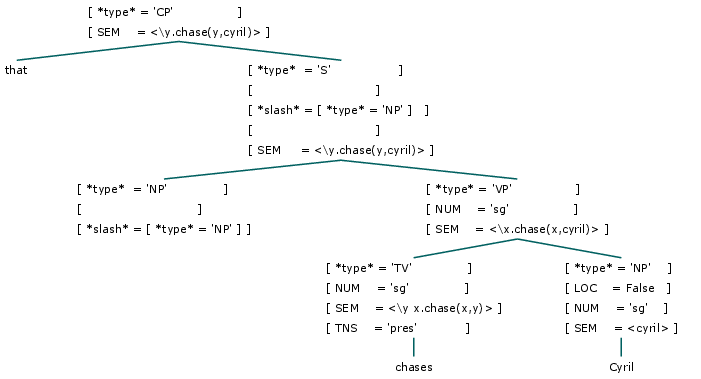

In [17]:
s2 = 'that chases Cyril'.split()
t2 = next(prs.parse(s2))
t2

pr = load_parser('/local/teach/cl21/grammar/simple-slash.fcfg', trace=0,cache=False)
s1 = 'Cyril chases some dog that chases Angus'.split()
t1 = next(pr.parse(s1))
t1prsThe CP production terminates the slash syntactically, and passes up the semantics of `S/NP`.  This is expressed in this production.
```
CP[SEM=?P] -> 'that' S[SEM=?P]/NP
```
Notice that the syntax for the semantics equations is `SEM=?P` rather than `SEM=<?P>`.  The syntax for the right hand side is `S[SEM=?P]/NP` rather than `S/NP[SEM=?P]`.

In [35]:
print(prs.grammar())

Grammar with 36 productions (start state = CP[])
    S[SEM=<?subj(?vp)>] -> DP[NUM=?n, SEM=?subj] VP[NUM=?n, SEM=?vp]
    S[SEM=<?vp(?subj)>] -> NP[NUM=?n, SEM=?subj] VP[NUM=?n, SEM=?vp]
    S[SEM=<\y.?vp(y,?subj)>]/NP[] -> NP[NUM=?n, SEM=?subj] VP[NUM=?n, SEM=?vp]/NP[]
    S[SEM=<\y.?vp(y)>]/NP[] -> NP[]/NP[] VP[NUM=?n, SEM=?vp]
    DP[NUM=?n, SEM=<?det(?nom)>] -> Det[NUM=?n, SEM=?det] N[NUM=?n, SEM=?nom]
    VP[NUM=?n, SEM=?v] -> IV[NUM=?n, SEM=?v]
    VP[NUM=?n, SEM=<?v(?obj)>] -> TV[NUM=?n, SEM=?v] NP[SEM=?obj]
    VP[NUM=?n, SEM=<\y x.?v(y,x)>]/NP[] -> TV[NUM=?n, SEM=?v] NP[]/NP[SEM=?obj]
    CP[SEM=?P] -> 'that' S[SEM=?P]/NP[]
    N[NUM=?n, SEM=<\x.(?P(x) & ?Q(x))>] -> N[NUM=?n, SEM=?P] CP[SEM=?Q]
    NP[-LOC, NUM='sg', SEM=<angus>] -> 'Angus'
    NP[-LOC, NUM='sg', SEM=<cyril>] -> 'Cyril'
    NP[-LOC, NUM='sg', SEM=<irene>] -> 'Irene'
    Det[NUM='sg', SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'every'
    Det[NUM='pl', SEM=<\P Q.all x.(P(x) -> Q(x))>] -> 'all'
    Det[SEM=<\P Q.exists

In [36]:
pr = load_parser('/local/teach/cl21/grammar/simple-sem-slash-cp.fcfg', trace=0,cache=False)
s1 = 'Angus chases Irene'.split()
t1 = next(pr.parse(s1))
t1

StopIteration: 

## Truth checking sentences with relative clauses
Since the semantics of slash categories and relative clauses has been handled in the lambda logic, 
there is nothing new with truth checking.  Here is a model with Angus chasing Cyril, and Cyril chasing
Irene.

In [18]:
v = """
angus => a
cyril => c
irene => i
man => {a,c}
woman => {i}
chase => {(a, c), (c, i)}
"""
    

In [38]:
val = nltk.Valuation.fromstring(v)
model_chase = nltk.Model(val.domain, val)
print(model_chase)
ass = nltk.Assignment(val.domain)

Domain = {'i', 'c', 'a'},
Valuation = 
{'angus': 'a',
 'chase': {('a', 'c'), ('c', 'i')},
 'cyril': 'c',
 'irene': 'i',
 'man': {('c',), ('a',)},
 'woman': {('i',)}}


We check the truth of the sentence *[some man that Angus chases t chases Irene]*.

In [39]:
pr = load_parser('/local/teach/cl21/grammar/simplest-sem-slash.fcfg', trace=0,cache=False)
s3 = 'some man that Angus chases chases Irene'.split()
f3=next(pr.parse(s3)).label()['SEM']
print(f3)
model_chase.evaluate(str(f3),ass)

exists x.(man(x) & chase(angus,x) & chase(x,irene))


True

In [40]:
type(f3)

nltk.sem.logic.ExistsExpression

We check the truth of the sentence *[some man that t chases Angus chases Irene]*.

In [21]:
s4 = 'some man that chases Angus chases Irene'.split()
f4=next(pr.parse(s4)).label()['SEM']
print(f4)
model_chase.evaluate(str(f4),ass)

exists x.(man(x) & chase(x,angus) & chase(x,irene))


False

We check the truth of the tautology *[every man that chases Angus chases Angus]*.

In [22]:
s5 = 'every man that chases Angus chases Angus'.split()
f5=next(pr.parse(s5)).label()['SEM']
print(f5)
model_chase.evaluate(str(f5),ass)

all x.((man(x) & chase(x,angus)) -> chase(x,angus))


True

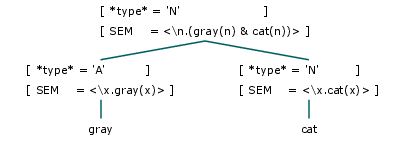

In [23]:
prc = load_parser('/local/teach/cl21/grammar/cat.fcfg', trace=0,cache=False)
s1 = 'gray cat'.split()
t1 = next(prc.parse(s1))
t1

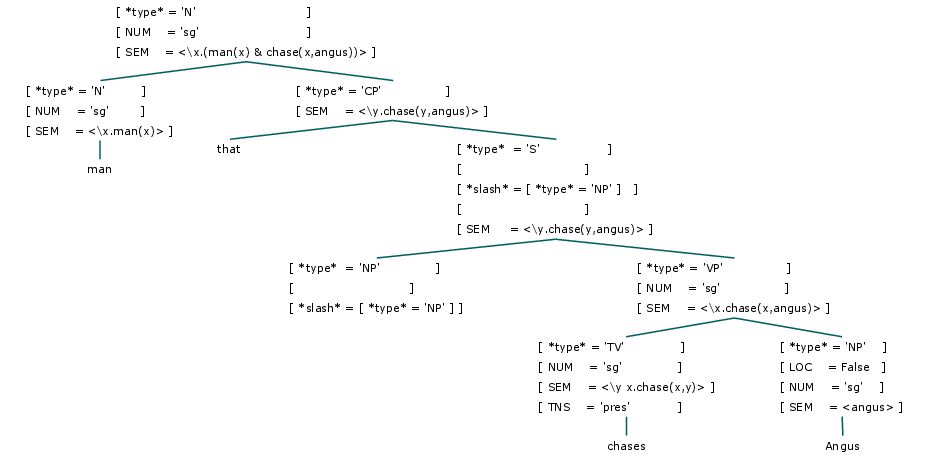

In [44]:
t5=next(pr.parse(s5))
t5[0][1]

In [24]:
t1.label()

N[SEM=<\n.(gray(n) & cat(n))>]